In [1]:
from integrators import contact as ic
from integrators.common import rk4
from lienard import integrator as li
from lienard import models as lm

def step6(system, dt, p, q, s, t, a=ic.a_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

def step6e(system, dt, p, q, s, t, a=ic.e_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

Lienard = lm.Lienard
VanDerPol = lm.VanDerPol


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as si
from mpl_toolkits import mplot3d
import progressbar
import warnings
warnings.filterwarnings("ignore") 

In [3]:
def err(x, y):
    return np.maximum.accumulate(np.abs(x-y))

In [4]:
def ivp_vdp(y, t, mu, a, omega):
    return [
        y[1],
        mu*(1-y[0]**2)*y[1] - y[0] + a*np.cos(omega*t)
    ]

## Maps Comparison

1 4.039925231481872 12.66493934380361 16.704864575285484
2 4.044269971606198 12.449111785800007 16.493381757406205
3 4.041239000042129 11.970329356318604 16.011568356360733
4 4.04305247516184 12.215900064708507 16.258952539870346
5 4.041041171527148 12.551977863474292 16.59301903500144
6 4.04123900004213 11.984832471098708 16.02607147114084


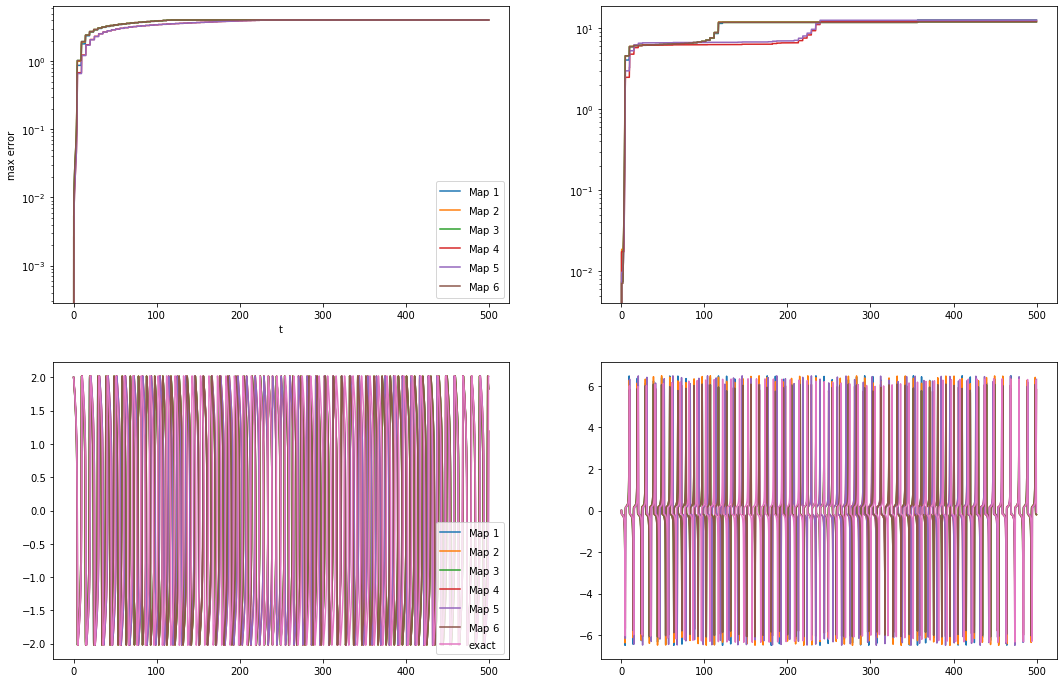

In [10]:
tf = 500
p0, q0, s0 = 0, 2., 0.
epsilon = 4
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(18,12))
tspan = np.arange(0, tf, 0.1)
errq=np.zeros(len(tspan))
errs=np.zeros(len(tspan))
y_init, params = [2, 0], (4,0,0)

y_odeint, info = si.odeint(ivp_vdp, y_init, tspan, params, rtol=1e-13, atol=1e-15, full_output=True)
i=1
for j in li.mappers:
    sol, sols, _ = li.multimapintegrate(stepper=li.step1, system=vdp, tspan=tspan, p0=p0, q0=q0, s0=s0, j=[j,j])
    errq=err(sol[:,1],y_odeint[:, 0])
    errs=err(sols, y_odeint[:, 1])
    plt.subplot(221)
    plt.xlabel("t")
    plt.ylabel("max error")
    plt.plot(tspan,errq,label=f"Map ${i}$")
    plt.yscale('log')
    plt.legend(loc='lower right')
    plt.subplot(222)
    plt.plot(tspan,errs,label=f"Map ${i}$")
    plt.yscale('log')
    plt.subplot(223)
    plt.plot(tspan,sol[:,1],label=f"Map ${i}$")
    plt.legend(loc='lower right')
    plt.subplot(224)
    plt.plot(tspan,sols,label=f";ap ${i}$")
    print(i,np.max(errq),np.max(errs),np.max(errq+errs))
    i+=1

plt.subplot(223)
plt.plot(tspan,y_odeint[:, 0],label="exact")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,y_odeint[:, 1],label="exact")
plt.show()

## Multiple Maps comparison

1 2 4.042033594329361 12.587701796835951 16.629735391165312
1 3 4.062101019017286 12.517543069322866 16.579644088340153
1 4 3.841095324678607 6.695516291723329 10.536611616401935
1 5 4.042247472084155 12.696540276009525 16.738787748093678
1 6 4.061412302314091 12.61368999508129 16.67510229739538
2 1 4.042362321243148 12.57970849228435 16.6220708135275
2 3 4.063758023517907 12.60959116479403 16.67334918831194
2 4 4.06145919984899 12.732021263444777 16.79348046329377
2 5 4.044265981504237 12.826479730971297 16.870745712475532
2 6 4.064437517940295 12.532201780905034 16.59663929884533
3 1 4.061447275301545 12.473305200411314 16.53475247571286
3 2 4.0644579826220735 12.56895322331437 16.633411205936444
3 4 4.045780454258102 12.361208903814553 16.406989358072657
3 5 4.058410829137574 11.58082237128087 15.639233200418445
3 6 4.041289866920009 11.973803054720998 16.015092921641006
4 1 3.840749776402281 6.703979248478796 10.544729024881077
4 2 4.060005162548023 12.270140448190826 16.3301456107

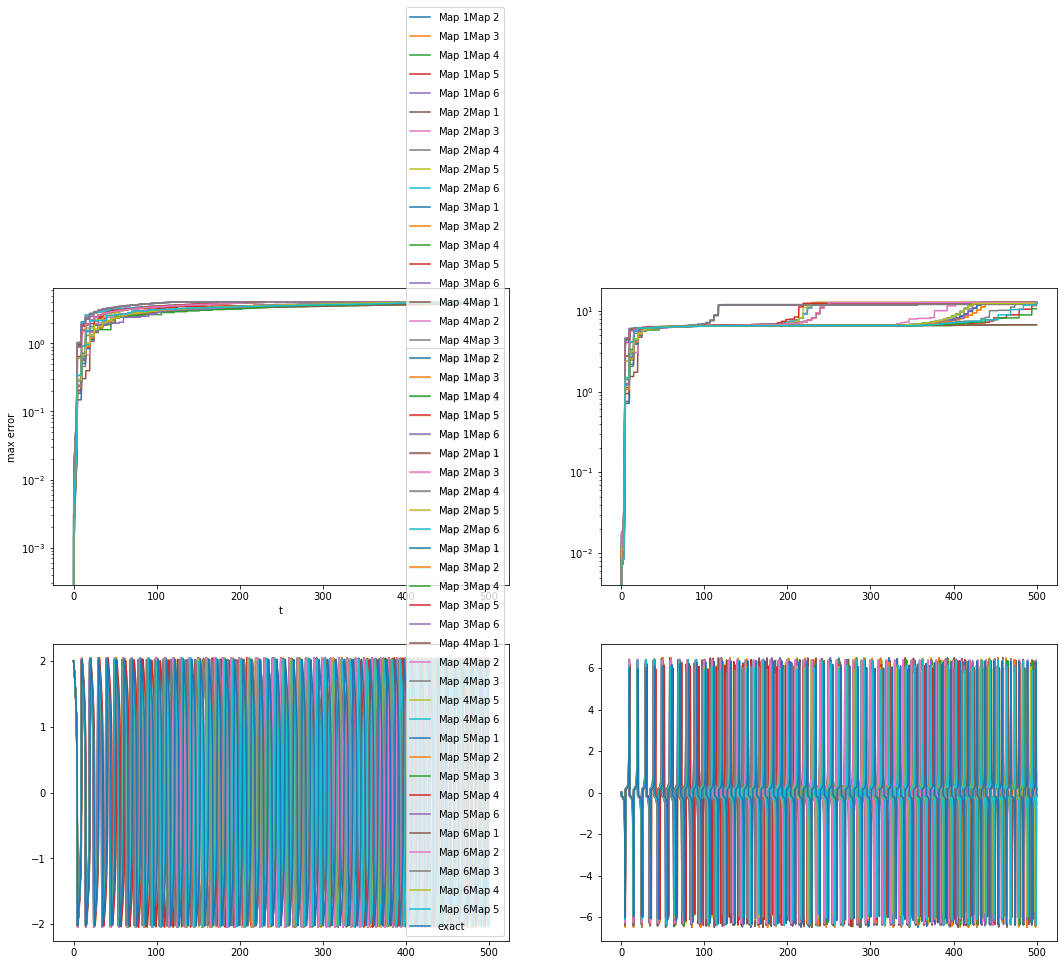

In [11]:
tf = 500
p0, q0, s0 = 0, 2., 0.
epsilon = 4
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(18,12))
tspan = np.arange(0, tf, 0.1)
errq=np.zeros(len(tspan))
errs=np.zeros(len(tspan))
y_init, params = [2, 0], (4,0,0)

y_odeint, info = si.odeint(ivp_vdp, y_init, tspan, params, rtol=1e-13, atol=1e-15, full_output=True)
k0=1
for i in li.mappers:
    k1=1
    for j in li.mappers:
        if k1==0:
            k1=1
        if k0==0:
            k0=1
        if i!=j:
            sol, sols, _ = li.multimapintegrate(stepper=li.step1, system=vdp, tspan=tspan, p0=p0, q0=q0, s0=s0, j=[i,j])
            errq=err(sol[:,1],y_odeint[:, 0])
            errs=err(sols, y_odeint[:, 1])
            plt.subplot(221)
            plt.xlabel("t")
            plt.ylabel("max error")
            plt.plot(tspan,errq,label=f"Map ${k0}$" f"Map ${k1}$")
            plt.yscale('log')
            plt.legend(loc='lower right')
            plt.subplot(222)
            plt.plot(tspan,errs,label=f"Map ${k0}$" f"Map ${k1}$")
            plt.yscale('log')
            plt.subplot(223)
            plt.plot(tspan,sol[:,1],label=f"Map ${k0}$" f"Map ${k1}$")
            plt.legend(loc='lower right')
            plt.subplot(224)
            plt.plot(tspan,sols,label=f"Map ${k0}$" f"Map ${k1}$")
            print(k0,k1,np.max(errq),np.max(errs),np.max(errq+errs))
        k1=((k1+1)%7)
    k0=((k0+1)%7)

plt.subplot(223)
plt.plot(tspan,y_odeint[:, 0],label="exact")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,y_odeint[:, 1],label="exact")
plt.show()

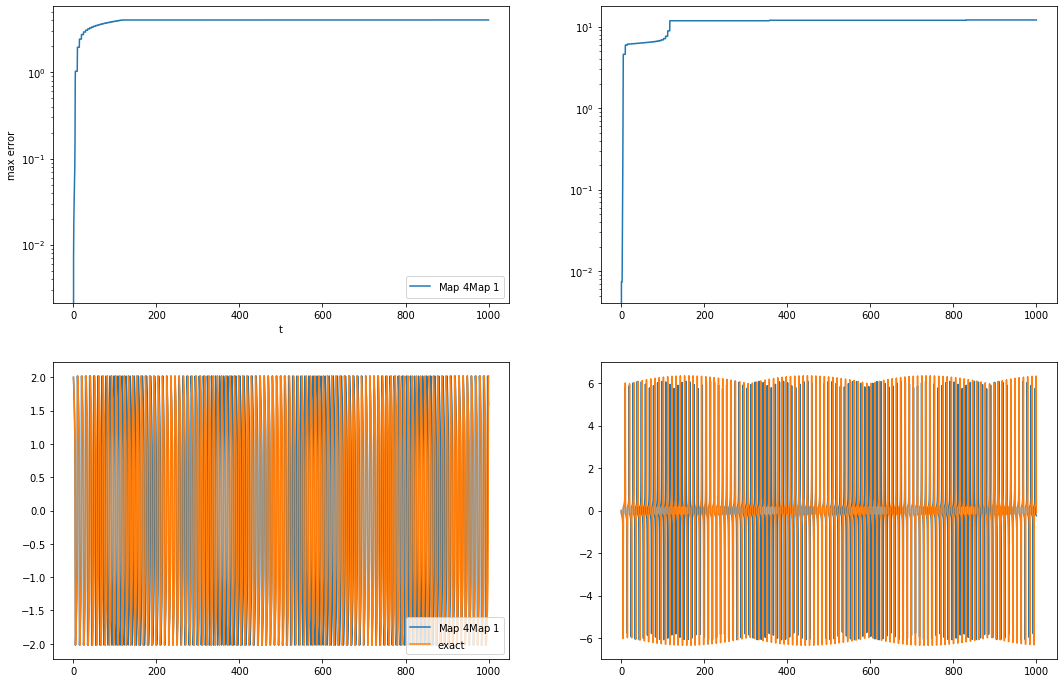

In [12]:
tf = 1000
p0, q0, s0 = 0, 2., 0.
epsilon = 4
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(18,12))
tspan = np.arange(0, tf, 0.1)
errq=np.zeros(len(tspan))
errs=np.zeros(len(tspan))
y_init, params = [2, 0], (4,0,0)

y_odeint, info = si.odeint(ivp_vdp, y_init, tspan, params, rtol=1e-13, atol=1e-15, full_output=True)
k0=4
k1=1
sol, sols, _ = li.multimapintegrate(stepper=li.step1, system=vdp, tspan=tspan, p0=p0, q0=q0, s0=s0, j=[li.mappers[k0+1],li.mappers[k1+1]])
errq=err(sol[:,1],y_odeint[:, 0])
errs=err(sols, y_odeint[:, 1])
plt.subplot(221)
plt.xlabel("t")
plt.ylabel("max error")
plt.plot(tspan,errq,label=f"Map ${k0}$" f"Map ${k1}$")
plt.yscale('log')
plt.legend(loc='lower right')
plt.subplot(222)
plt.plot(tspan,errs,label=f"Map ${k0}$" f"Map ${k1}$")
plt.yscale('log')
plt.subplot(223)
plt.plot(tspan,sol[:,1],label=f"Map ${k0}$" f"Map ${k1}$")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,sols,label=f"Map ${k0}$" f"Map ${k1}$")
plt.subplot(223)
plt.plot(tspan,y_odeint[:, 0],label="exact")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,y_odeint[:, 1],label="exact")
plt.show()

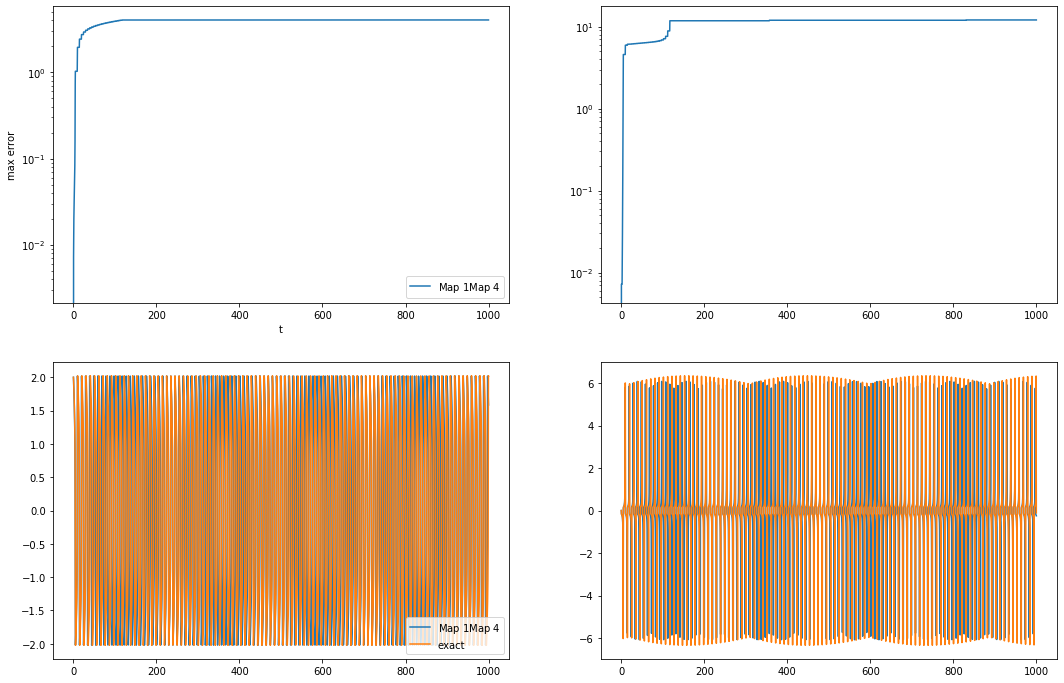

In [13]:
tf = 1000
p0, q0, s0 = 0, 2., 0.
epsilon = 4
vdp = VanDerPol(epsilon, 0, 0)
plt.figure(figsize=(18,12))
tspan = np.arange(0, tf, 0.1)
errq=np.zeros(len(tspan))
errs=np.zeros(len(tspan))
y_init, params = [2, 0], (4,0,0)

y_odeint, info = si.odeint(ivp_vdp, y_init, tspan, params, rtol=1e-13, atol=1e-15, full_output=True)
k0=1
k1=4
sol, sols, _ = li.multimapintegrate(stepper=li.step1, system=vdp, tspan=tspan, p0=p0, q0=q0, s0=s0, j=[li.mappers[k0+1],li.mappers[k1+1]])
errq=err(sol[:,1],y_odeint[:, 0])
errs=err(sols, y_odeint[:, 1])
plt.subplot(221)
plt.xlabel("t")
plt.ylabel("max error")
plt.plot(tspan,errq,label=f"Map ${k0}$" f"Map ${k1}$")
plt.yscale('log')
plt.legend(loc='lower right')
plt.subplot(222)
plt.plot(tspan,errs,label=f"Map ${k0}$" f"Map ${k1}$")
plt.yscale('log')
plt.subplot(223)
plt.plot(tspan,sol[:,1],label=f"Map ${k0}$" f"Map ${k1}$")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,sols,label=f"Map ${k0}$" f"Map ${k1}$")
plt.subplot(223)
plt.plot(tspan,y_odeint[:, 0],label="exact")
plt.legend(loc='lower right')
plt.subplot(224)
plt.plot(tspan,y_odeint[:, 1],label="exact")
plt.show()